### 1. Exploratory Data Analysis (EDA)

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  4200 non-null   int64  
 1   Gender               4200 non-null   int64  
 2   Ethnicity            4200 non-null   int64  
 3   Family_History       4200 non-null   int64  
 4   Diabetes             4200 non-null   int64  
 5   Smoking_Status       4200 non-null   int64  
 6   Physical_Activity    4200 non-null   int64  
 7   Salt_Intake          4200 non-null   int64  
 8   Alcohol_Consumption  4200 non-null   int64  
 9   BMI                  4200 non-null   float64
 10  Systolic_BP          4200 non-null   float64
 11  Diastolic_BP         4200 non-null   float64
 12  Total_Cholesterol    4200 non-null   float64
 13  Heart_Rate           4200 non-null   float64
 14  Hypertension         4200 non-null   int64  
dtypes: float64(5), int64(10)
memory usage:

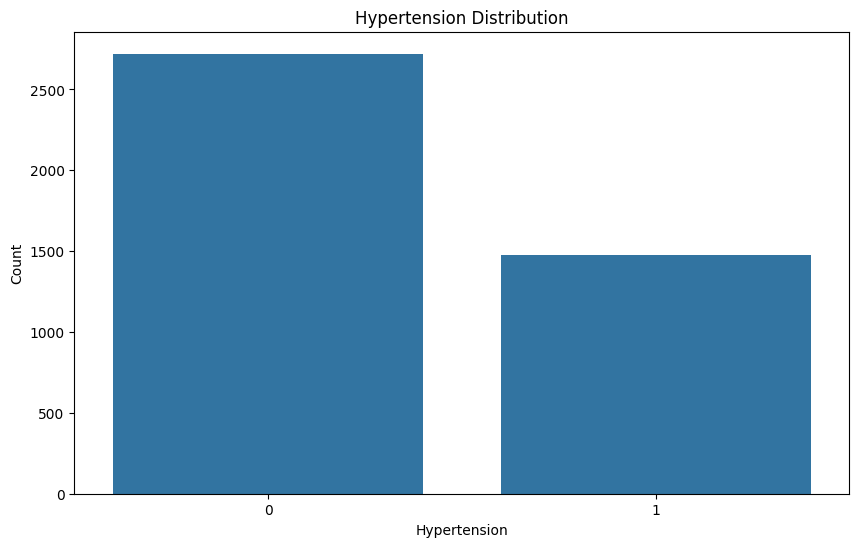

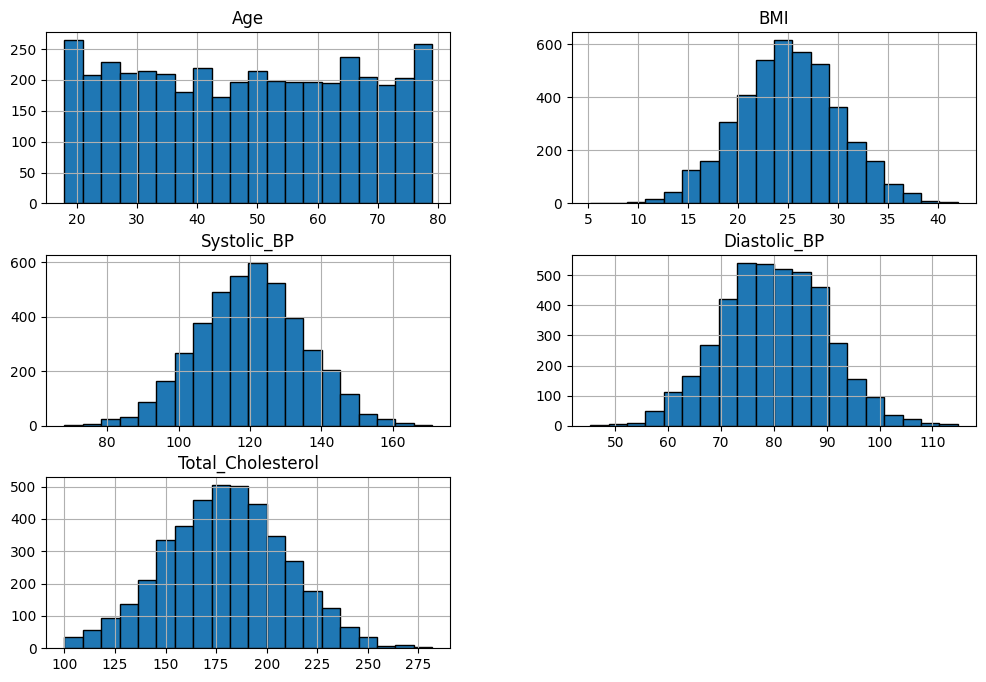

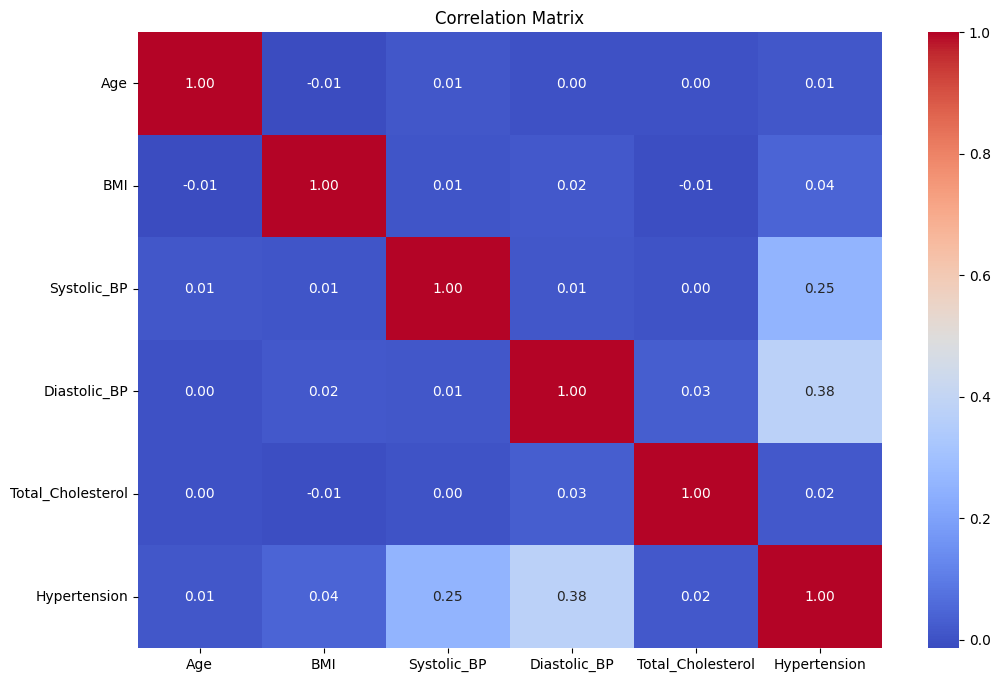

In [38]:

# # notebook/EDA_Modeling.ipynb
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load data
# data = pd.read_csv('../data/hypertension_data.csv')

# # Basic exploration
# print(data.info())
# print(data.describe())
# print(data['target'].value_counts())

# # Visualizations
# plt.figure(figsize=(10,6))
# sns.countplot(x='target', data=data)
# plt.title('Hypertension Distribution')

# numerical_features = ['age', 'bmi', 'blood_pressure', 'cholesterol']
# data[numerical_features].hist(figsize=(12,8))

# # Correlation matrix
# plt.figure(figsize=(12,8))
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm')



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('../data/hypertension_dataset.csv')

# Basic exploration
print(data.info())
print(data.describe())
print(data['Hypertension'].value_counts())

# Visualizations
plt.figure(figsize=(10,6))
sns.countplot(x='Hypertension', data=data)
plt.title('Hypertension Distribution')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

# Selecting relevant numerical features for analysis
numerical_features = ['Age', 'BMI', 'Systolic_BP', 'Diastolic_BP', 'Total_Cholesterol']
data[numerical_features].hist(figsize=(12,8), bins=20, edgecolor='black')
plt.show()

# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(data[numerical_features + ['Hypertension']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


### 2. Feature Engineering & Preprocessing

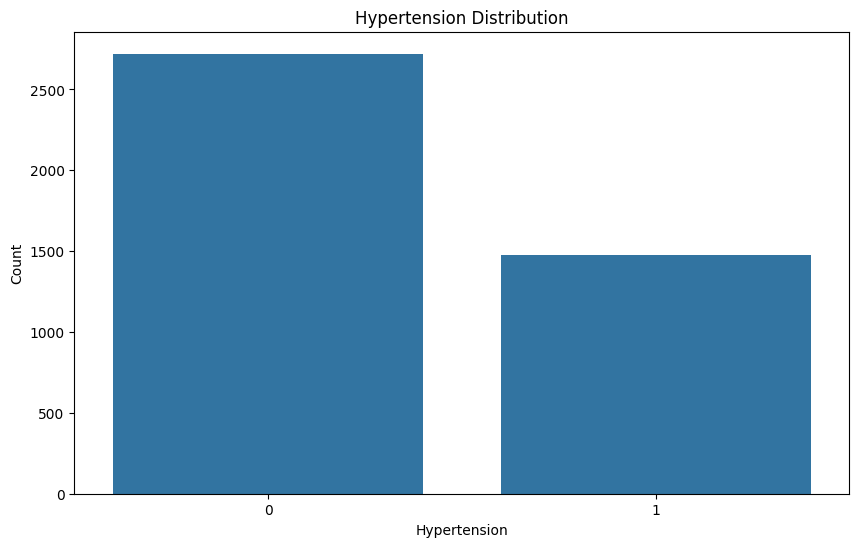

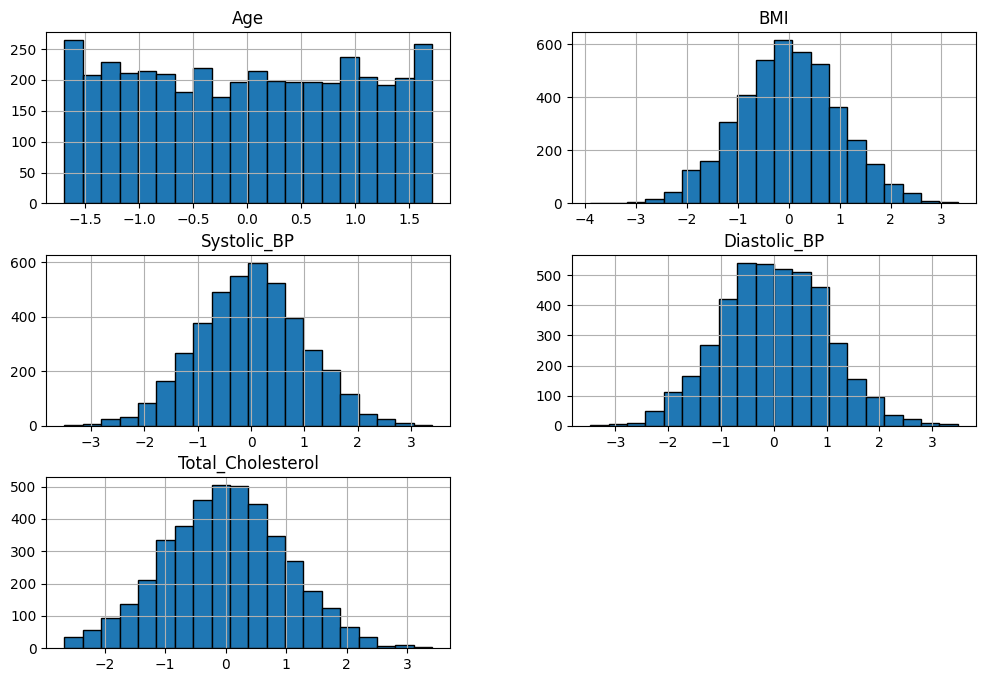

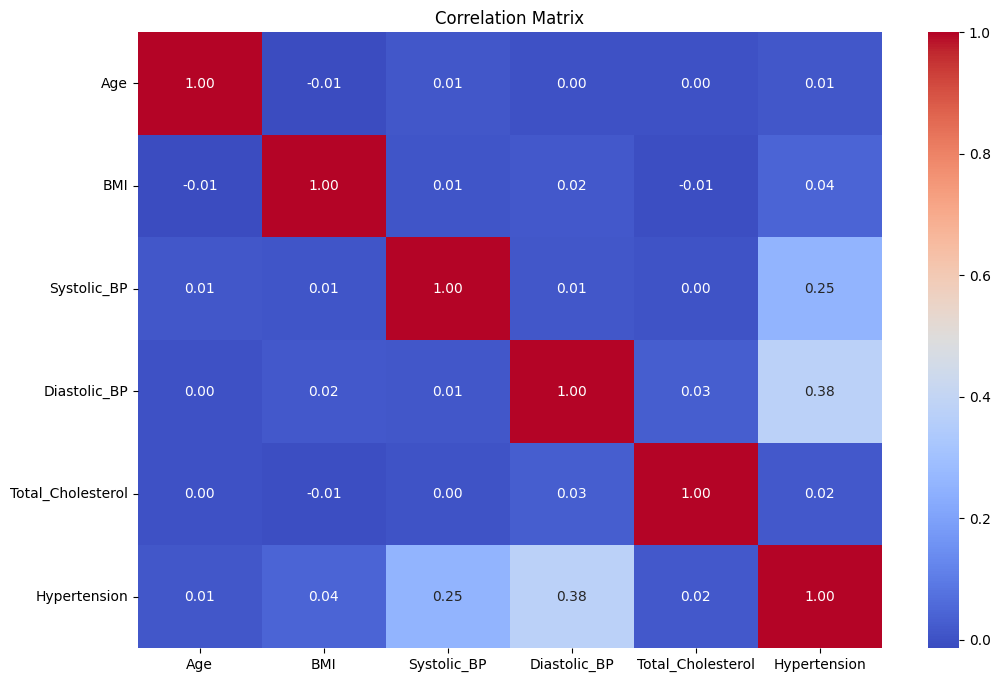

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].median())

# Selecting relevant numerical features for ML
selected_features = ['Age', 'BMI', 'Systolic_BP', 'Diastolic_BP', 'Total_Cholesterol']

# Feature scaling
scaler = StandardScaler()
data[selected_features] = scaler.fit_transform(data[selected_features])

# Split data
X = data[selected_features]
y = data['Hypertension']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizations
plt.figure(figsize=(10,6))
sns.countplot(x='Hypertension', data=data)
plt.title('Hypertension Distribution')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

# Histogram of selected features
data[selected_features].hist(figsize=(12,8), bins=20, edgecolor='black')
plt.show()

# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(data[selected_features + ['Hypertension']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


### 3. Model Development & Optimization

Logistic Regression Accuracy: 0.7726
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       566
           1       0.70      0.53      0.60       274

    accuracy                           0.77       840
   macro avg       0.75      0.71      0.72       840
weighted avg       0.76      0.77      0.76       840

Random Forest Accuracy: 0.8881
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       566
           1       0.98      0.67      0.80       274

    accuracy                           0.89       840
   macro avg       0.92      0.83      0.86       840
weighted avg       0.90      0.89      0.88       840

XGBoost Accuracy: 0.8631
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       566
           1       0.86      0.69      0.77       274

    accuracy                           0.86       840
   macro avg       0.86      0.82  

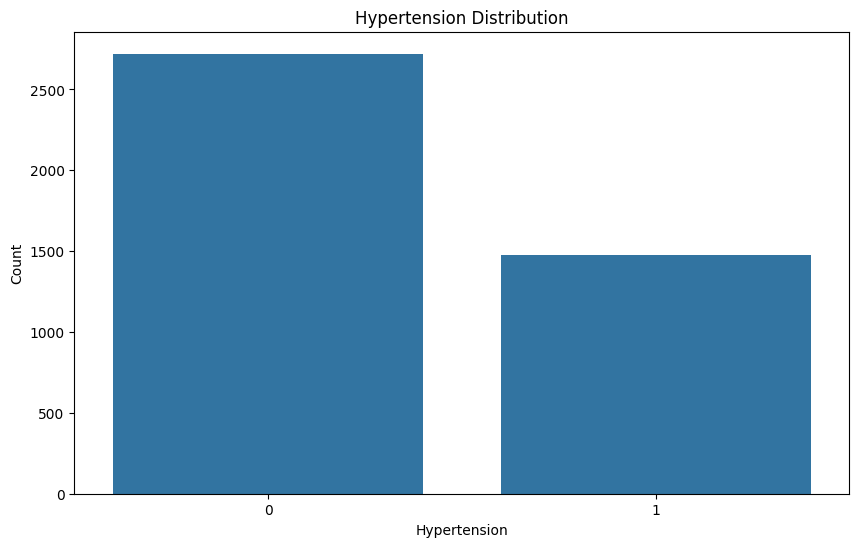

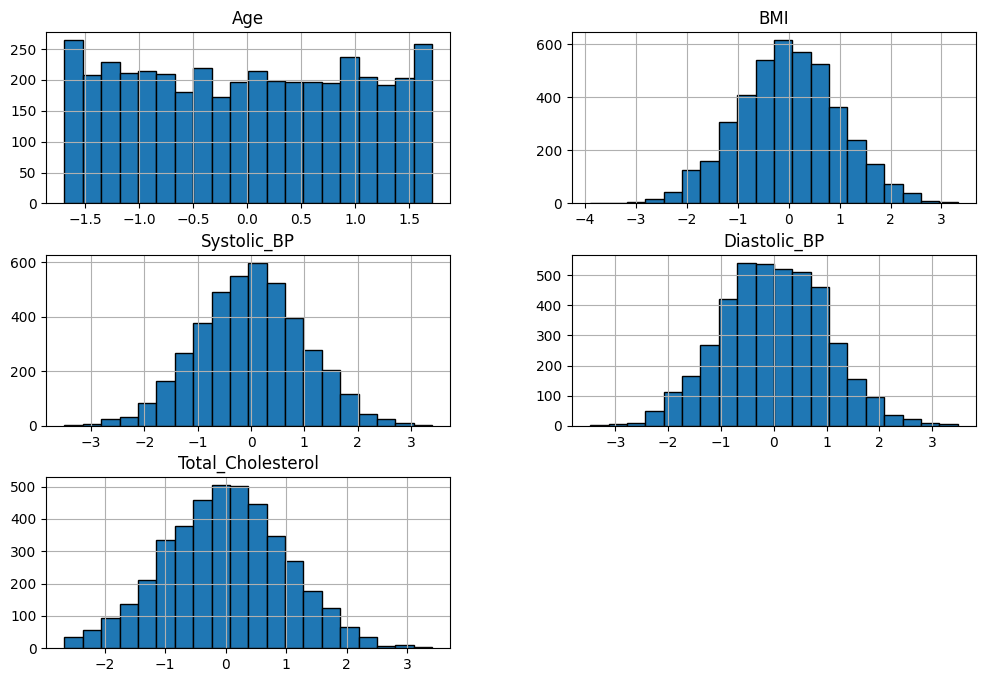

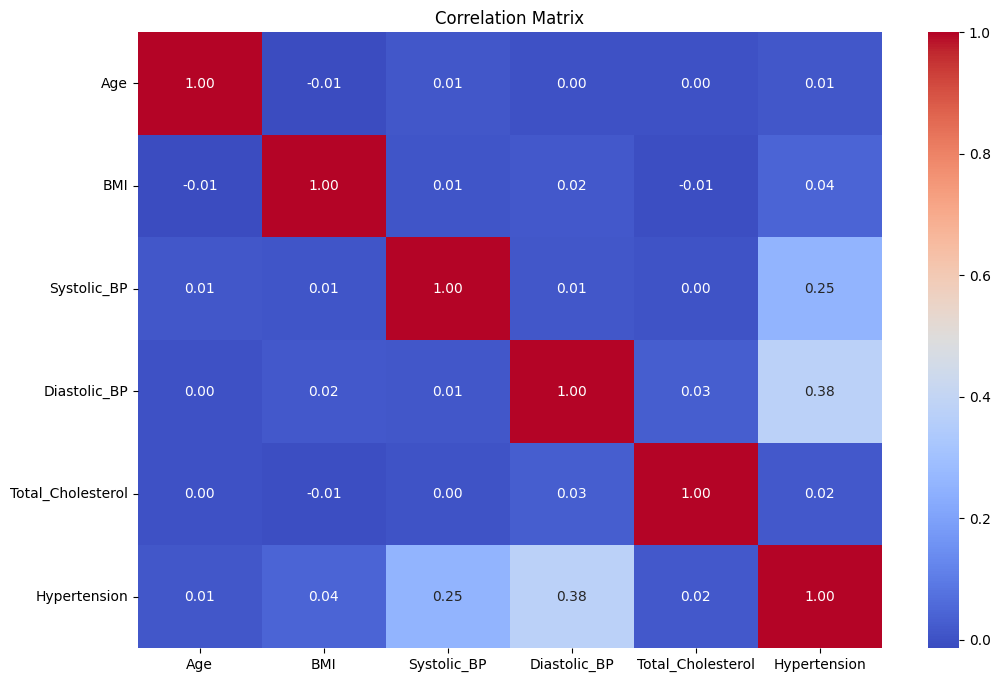

In [40]:
# # notebook/EDA_Modeling.ipynb
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# # Initialize models
# models = {
#     'Logistic Regression': LogisticRegression(),
#     'Random Forest': RandomForestClassifier(),
#     'XGBoost': XGBClassifier(),
#     'SVM': SVC()
# }

# # Hyperparameter tuning for Random Forest
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5]
# }

# rf = RandomForestClassifier()
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)
# best_rf = grid_search.best_estimator_

# # Evaluate models
# from sklearn.metrics import accuracy_score, classification_report

# for name, model in models.items():
#     model.fit(X_train, y_train)
#     preds = model.predict(X_test)
#     print(f"{name} Accuracy: {accuracy_score(y_test, preds)}")
#     print(classification_report(y_test, preds))

# # Save best model
# import joblib
# joblib.dump(best_rf, '../models/.pkl')



# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'SVM': SVC()
}

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(classification_report(y_test, preds))

# Save best model
joblib.dump(best_rf, '../models/best_rf_model.pkl')

# Visualizations
plt.figure(figsize=(10,6))
sns.countplot(x='Hypertension', data=data)
plt.title('Hypertension Distribution')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

# Selecting relevant numerical features for analysis
data[numerical_features].hist(figsize=(12,8), bins=20, edgecolor='black')
plt.show()

# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(data[numerical_features + ['Hypertension']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [41]:
X

,Age,BMI,Systolic_BP,Diastolic_BP,Total_Cholesterol
0,-0.406689,-1.133865,-1.149568,0.713519,-0.168674
1,-0.127643,0.984697,1.139386,-1.305766,1.037637
2,0.876920,0.160812,-0.881854,-0.875918,-0.085135
3,0.821111,-0.329596,0.550415,0.763501,0.088628
4,0.151402,1.553570,0.717736,0.493597,1.345063
...,...,...,...,...,...
4195,-0.908971,-0.113817,-0.112177,0.593561,-0.726719
4196,-0.964780,1.337790,0.537029,-0.076202,1.552241
4197,-0.016025,-1.173097,0.804743,0.213696,-0.439343
4198,-0.127643,-0.192282,-0.627526,0.943437,-0.542932
